In [1]:
# import dependencies
from pprint import pprint
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

In [2]:
# load amzn data and format
amzn_raw_df = pd.read_csv('Resources/amzn_stock_data_raw.csv')
amzn_df = amzn_raw_df[['t','n','v','vw','o','c','h','l']].rename(columns={'v':'volume',\
                                                            'vw':'volume weighted average price',\
                                                            'o':'open', 'c':'close',\
                                                            'h':'high', 'l':'low',\
                                                            't':'Date','n':'transaction count'})
amzn_df.sort_values('Date', ascending=True, inplace=True)
amzn_df['Date'] = pd.to_datetime(amzn_df['Date'], origin='unix', unit='ms').dt.date

# displaying amzn_df
amzn_df.head()

,Date,transaction count,volume,volume weighted average price,open,close,high,low
0,2020-01-02,102920,4035910.0,1882.8283,1875.00,1898.01,1898.0100,1864.1500
1,2020-01-03,99633,3766604.0,1875.4284,1864.50,1874.97,1886.1965,1864.5000
2,2020-01-06,104160,4065698.0,1891.9954,1860.00,1902.88,1903.6900,1860.0000
3,2020-01-07,98636,4134010.0,1903.2183,1904.50,1906.86,1913.8900,1892.0433
4,2020-01-08,95706,3511966.0,1900.4983,1898.04,1891.97,1910.9999,1886.4448


In [3]:
# load covid data, format date and sort
us_covid_raw_df = pd.read_csv('../Covid/US_covid.csv')
us_covid_raw_df['Date'] = pd.to_datetime(us_covid_raw_df['Date']).dt.date
us_covid_raw_df.sort_values('Date', ascending=True)
us_covid_raw_df.head()


,Date,Country,New Cases,Cumulative Cases,New Deaths,Cumulative Deaths
0,2020-01-03,United States of America,0,0,0,0
1,2020-01-04,United States of America,0,0,0,0
2,2020-01-05,United States of America,0,0,0,0
3,2020-01-06,United States of America,0,0,0,0
4,2020-01-07,United States of America,0,0,0,0


In [4]:
# saving dfs to csv files for team use
# us_covid_raw_df.to_csv('test/covid.csv')
# amzn_df.to_csv('test/amzn.csv')

In [5]:
### testing for date format matching before merge
# covidraw index 0 is 2022-01-03
print(us_covid_raw_df.iloc[0,0])
print(type(us_covid_raw_df.iloc[0,0]))

# amzn index 1 is 2022-01-03
print(amzn_df.iloc[1,0])
print(type(amzn_df.iloc[1,0]))

2020-01-03
<class 'datetime.date'>
2020-01-03
<class 'datetime.date'>


In [6]:
# merging data on date
all_dates_df = pd.merge(us_covid_raw_df, amzn_df, how='inner', on='Date')
all_dates_df.head()

# saving new dfs to csvs for team
# all_dates_df.to_csv('Resources/all_dates_combined.csv')

,Date,Country,New Cases,Cumulative Cases,New Deaths,Cumulative Deaths,transaction count,volume,volume weighted average price,open,close,high,low
0,2020-01-03,United States of America,0,0,0,0,99633,3766604.0,1875.4284,1864.50,1874.97,1886.1965,1864.5000
1,2020-01-06,United States of America,0,0,0,0,104160,4065698.0,1891.9954,1860.00,1902.88,1903.6900,1860.0000
2,2020-01-07,United States of America,0,0,0,0,98636,4134010.0,1903.2183,1904.50,1906.86,1913.8900,1892.0433
3,2020-01-08,United States of America,0,0,0,0,95706,3511966.0,1900.4983,1898.04,1891.97,1910.9999,1886.4448
4,2020-01-09,United States of America,0,0,0,0,84377,3174962.0,1906.0261,1909.89,1901.05,1917.8200,1895.8038


In [7]:
volume_df = all_dates_df.loc[:,['Date','New Cases','New Deaths','volume']]

# adding columns for 1 month to 12 month stock performance offsets, accounting for the lag of stock parameters changing due to covid parameters
# this is useful becuase news agencies couldn't report covid stats instantaneously. There had to be some lag
# also will add 1 week, 2 week, and 3 week lag columns
volume_df["1_week_future_vol"] = pd.Series([], dtype=float)
volume_df["2_week_future_vol"] = pd.Series([], dtype=float)
volume_df["3_week_future_vol"] = pd.Series([], dtype=float)
volume_df["1_month_future_vol"] = pd.Series([], dtype=float)
volume_df["2_month_future_vol"] = pd.Series([], dtype=float)
volume_df["3_month_future_vol"] = pd.Series([], dtype=float)
volume_df["4_month_future_vol"] = pd.Series([], dtype=float)
volume_df["5_month_future_vol"] = pd.Series([], dtype=float)
volume_df["6_month_future_vol"] = pd.Series([], dtype=float)
volume_df["7_month_future_vol"] = pd.Series([], dtype=float)
volume_df["8_month_future_vol"] = pd.Series([], dtype=float)
volume_df["9_month_future_vol"] = pd.Series([], dtype=float)
volume_df["10_month_future_vol"] = pd.Series([], dtype=float)
volume_df["11_month_future_vol"] = pd.Series([], dtype=float)
volume_df["12_month_future_vol"] = pd.Series([], dtype=float)

volume_df.head()

,Date,New Cases,New Deaths,volume,1_week_future_vol,2_week_future_vol,3_week_future_vol,1_month_future_vol,2_month_future_vol,3_month_future_vol,4_month_future_vol,5_month_future_vol,6_month_future_vol,7_month_future_vol,8_month_future_vol,9_month_future_vol,10_month_future_vol,11_month_future_vol,12_month_future_vol
0,2020-01-03,0,0,3766604.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-06,0,0,4065698.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-07,0,0,4134010.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-08,0,0,3511966.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-09,0,0,3174962.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
price_df = all_dates_df.loc[:,['Date','New Cases','New Deaths','volume weighted average price']]

# adding columns for 1 month to 12 month stock performance offsets, accounting for the lag of stock parameters changing due to covid parameters
# this is useful becuase news agencies couldn't report covid stats instantaneously. There had to be some lag
# also will add 1 week, 2 week, and 3 week lag columns
price_df["1_week_future_price"] = pd.Series([], dtype=float)
price_df["2_week_future_price"] = pd.Series([], dtype=float)
price_df["3_week_future_price"] = pd.Series([], dtype=float)
price_df["1_month_future_price"] = pd.Series([], dtype=float)
price_df["2_month_future_price"] = pd.Series([], dtype=float)
price_df["3_month_future_price"] = pd.Series([], dtype=float)
price_df["4_month_future_price"] = pd.Series([], dtype=float)
price_df["5_month_future_price"] = pd.Series([], dtype=float)
price_df["6_month_future_price"] = pd.Series([], dtype=float)
price_df["7_month_future_price"] = pd.Series([], dtype=float)
price_df["8_month_future_price"] = pd.Series([], dtype=float)
price_df["9_month_future_price"] = pd.Series([], dtype=float)
price_df["10_month_future_price"] = pd.Series([], dtype=float)
price_df["11_month_future_price"] = pd.Series([], dtype=float)
price_df["12_month_future_price"] = pd.Series([], dtype=float)

price_df.head()

,Date,New Cases,New Deaths,volume weighted average price,1_week_future_price,2_week_future_price,3_week_future_price,1_month_future_price,2_month_future_price,3_month_future_price,4_month_future_price,5_month_future_price,6_month_future_price,7_month_future_price,8_month_future_price,9_month_future_price,10_month_future_price,11_month_future_price,12_month_future_price
0,2020-01-03,0,0,1875.4284,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-06,0,0,1891.9954,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-07,0,0,1903.2183,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-08,0,0,1900.4983,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-09,0,0,1906.0261,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# getting offset volume and price data into dfs

# setting offsets in # of business days
offset_list = [5,10,15,22,44,66,88,110,132,154,176,198,220,242,264]

start_column = 4
for index, value in volume_df.iterrows():
    try:
        for offset in offset_list:
            volume_df.iloc[index,start_column+offset_list.index(offset)] = volume_df.iloc[index+offset,3]
    except:
        pass

for index, value in price_df.iterrows():
    try:
        for offset in offset_list:
            price_df.iloc[index,start_column+offset_list.index(offset)] = price_df.iloc[index+offset,3]
    except:
        pass

# print("volume_df:\n",volume_df.head())
# print("\n\nprice_df:\n",price_df.head())

In [10]:
# getting only dates with new reported cases/deaths
filtered_volume_df = volume_df.loc[volume_df["New Cases"] != 0].dropna()
filtered_price_df = price_df.loc[price_df["New Cases"] != 0].dropna()

In [11]:
### saving filtered dfs to csv files
filtered_volume_df.to_csv('Resources/amzn_volumes.csv')
filtered_price_df.to_csv('Resources/amzn_prices.csv')

In [12]:
volume_r_vals = {}
price_r_vals = {}
volume_r2_vals = {}
price_r2_vals = {}

numbers_df = filtered_volume_df.iloc[:,start_column:start_column+15]
for index in numbers_df.columns:
    temp_df = filtered_volume_df.loc[:,["New Cases",index]]
    temp_df.dropna(inplace=True)
    slope, int, r, p, std_err = stats.linregress(temp_df["New Cases"], temp_df[index])
    volume_r_vals[index] = r
    volume_r2_vals[index] = pow(r,2)
    print(f"{index} data has an r-val of {r}")

numbers_df = filtered_price_df.iloc[:,start_column:start_column+15]
for index in numbers_df.columns:
    temp_df = filtered_price_df.loc[:,["New Cases",index]]
    temp_df.dropna(inplace=True)
    slope, int, r, p, std_err = stats.linregress(temp_df["New Cases"], temp_df[index])
    price_r_vals[index] = r
    price_r2_vals[index] = pow(r,2)
    print(f"{index} data has an r-val of {r}")

# print(volume_r_vals)
# print(price_r_vals)

# 1_month_future_vol data has an r-val of -0.4333475134369967
# 7_month_future_price data has an r-val of 0.5142405161536403

# 1_month_future_price data has an r-val of 0.39754131363224954
# 7_month_future_vol data has an r-val of -0.2974661122765744


1_week_future_vol data has an r-val of -0.2712069637003305
2_week_future_vol data has an r-val of -0.2597386949702625
3_week_future_vol data has an r-val of -0.352228050743587
1_month_future_vol data has an r-val of -0.48519444094272773
2_month_future_vol data has an r-val of -0.0873390077807319
3_month_future_vol data has an r-val of -0.15490332191712813
4_month_future_vol data has an r-val of -0.4461893302926788
5_month_future_vol data has an r-val of -0.1705485740101151
6_month_future_vol data has an r-val of -0.3145559173187314
7_month_future_vol data has an r-val of -0.2791280554473907
8_month_future_vol data has an r-val of -0.3914072784695992
9_month_future_vol data has an r-val of -0.0014967223929289533
10_month_future_vol data has an r-val of -0.44619442922849384
11_month_future_vol data has an r-val of -0.06799972497964055
12_month_future_vol data has an r-val of -0.26895588731648223
1_week_future_price data has an r-val of 0.6325781585820954
2_week_future_price data has an r

<Figure size 432x288 with 0 Axes>

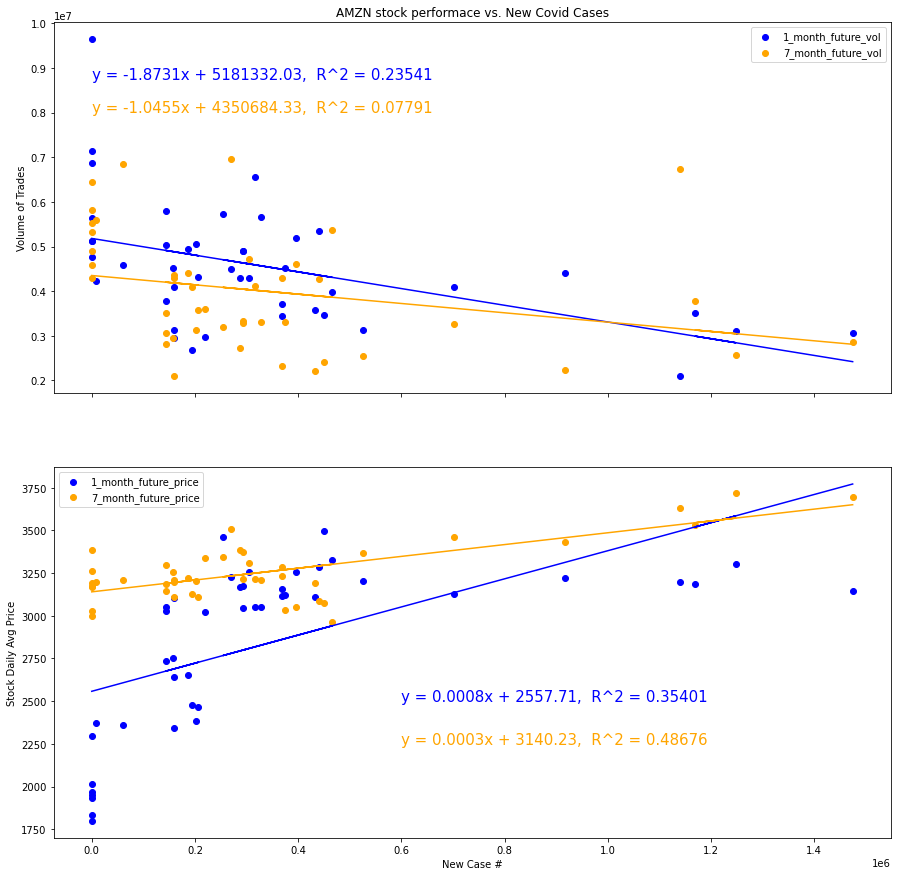

'\nIs volume dollar value of trades or number of trades?\n\n'

In [13]:
# Question: Describing the affect of new covid cases and deaths on AMZN volume and weighted average price:
# Which time offset(s) have the strongest correlation (r-value)?

plt.clf()
fig, (ax1, ax2) = plt.subplots(2, sharex=True)
fig.set_figheight(15)
fig.set_figwidth(15)


cases_vol = filtered_volume_df["New Cases"]

ax1.scatter(filtered_volume_df["New Cases"], filtered_volume_df["1_month_future_vol"], color='blue', label='1_month_future_vol')
month_1_vol_slope, month_1_vol_int, month_1_vol_r, month_1_vol_p, month_1_vol_std_err = stats.linregress(cases_vol, filtered_volume_df["1_month_future_vol"])
month_1_vol_fit = month_1_vol_slope * cases_vol + month_1_vol_int
line_eq = "y = " + str(round(month_1_vol_slope,4)) + "x + " + str(round(month_1_vol_int,2)) + ",  R^2 = " + str(round(volume_r2_vals["1_month_future_vol"],5))
plt.text(0,8750000,line_eq,fontsize=15,color="blue",transform=ax1.transData)
ax1.plot(cases_vol, month_1_vol_fit, color='blue')

ax1.scatter(filtered_volume_df["New Cases"], filtered_volume_df["7_month_future_vol"], color='orange', label='7_month_future_vol')
month_7_vol_slope, month_7_vol_int, month_7_vol_r, month_7_vol_p, month_7_vol_std_err = stats.linregress(cases_vol, filtered_volume_df["7_month_future_vol"])
month_7_vol_fit = month_7_vol_slope * cases_vol + month_7_vol_int
line_eq = "y = " + str(round(month_7_vol_slope,4)) + "x + " + str(round(month_7_vol_int,2)) + ",  R^2 = " + str(round(volume_r2_vals["7_month_future_vol"],5))
plt.text(0,8000000,line_eq,fontsize=15,color="orange",transform=ax1.transData)
ax1.plot(cases_vol, month_7_vol_fit, color='orange')


cases_price = filtered_price_df["New Cases"]

ax2.scatter(filtered_price_df["New Cases"], filtered_price_df["1_month_future_price"], color='blue', label='1_month_future_price')
month_1_price_slope, month_1_price_int, month_1_price_r, month_1_price_p, month_1_price_std_err = stats.linregress(cases_price, filtered_price_df["1_month_future_price"])
month_1_price_fit = month_1_price_slope * cases_price + month_1_price_int
line_eq = "y = " + str(round(month_1_price_slope,4)) + "x + " + str(round(month_1_price_int,2)) + ",  R^2 = " + str(round(price_r2_vals["1_month_future_price"],5))
plt.text(600000,2500,line_eq,fontsize=15,color="blue",transform=ax2.transData)
ax2.plot(cases_price, month_1_price_fit, color='blue')

ax2.scatter(filtered_price_df["New Cases"], filtered_price_df["7_month_future_price"], color = 'orange', label='7_month_future_price')
month_7_price_slope, month_7_price_int, month_7_price_r, month_7_price_p, month_7_price_std_err = stats.linregress(cases_price, filtered_price_df["7_month_future_price"])
month_7_price_fit = month_7_price_slope * cases_price + month_7_price_int
line_eq = "y = " + str(round(month_7_price_slope,4)) + "x + " + str(round(month_7_price_int,2)) + ",  R^2 = " + str(round(price_r2_vals["7_month_future_price"],5))
plt.text(600000,2250,line_eq,fontsize=15,color="orange",transform=ax2.transData)
ax2.plot(cases_price, month_7_price_fit, color='orange')


ax1.set_title("AMZN stock performace vs. New Covid Cases")
ax1.set_ylabel("Volume of Trades")
ax1.legend()
ax2.set_ylabel("Stock Daily Avg Price")
ax2.set_xlabel("New Case #")
ax2.legend()
plt.savefig('Images/AMZN_Cases.png')
plt.show()

"""
Is volume dollar value of trades or number of trades?

"""

In [14]:
"""
Notes:
more cases = more uncertainty and less trading
compare correlation of 1 month and 6 month on same axes
side by side of new cases and new deaths, each w/ 1 and 6 month
separate dataframe for price and clean up both, removing unnecessary columns
export both to csvs and give to the team
make figure bigger plt.figsize
second viz could be price vs new cases

limitations: 

idea for Matusola:
volume / new cases ratio over time (line graph) -- does this mean anything?

show code for unique data cleaning

Intro slide
why we chose the data
questions
cleanup code
figures
next steps
limitations

"""

'\nNotes:\nmore cases = more uncertainty and less trading\ncompare correlation of 1 month and 6 month on same axes\nside by side of new cases and new deaths, each w/ 1 and 6 month\nseparate dataframe for price and clean up both, removing unnecessary columns\nexport both to csvs and give to the team\nmake figure bigger plt.figsize\nsecond viz could be price vs new cases\n\nlimitations: \n\nidea for Matusola:\nvolume / new cases ratio over time (line graph) -- does this mean anything?\n\nshow code for unique data cleaning\n\nIntro slide\nwhy we chose the data\nquestions\ncleanup code\nfigures\nnext steps\nlimitations\n\n'